# **라이브러리**

In [1]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

# **함수모음**

## **모델링**

In [2]:
def modeling(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < 0.5)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

def modeling_(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < optimal_threshold)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

######################################## Split train, test
def splittrain(data):
    subdata = data.sort_values(by='년').reset_index(drop=True)
    data = subdata.loc[subdata['년'] < 2016]
    return data

def splittesst(data):
    global test
    subdata = data.sort_values(by='년').reset_index(drop=True)
    test = subdata.loc[subdata['년'] >= 2016]
    return test

## **스코어**

In [3]:
def scoring(y_true, y_pred):
    """ print('accuracy:', accuracy_score(y_true,y_pred))
    print('f1-Score:', f1_score(y_true, y_pred))
    print('Recall:',recall_score(y_true, y_pred))
    print('Precision:',precision_score(y_true, y_pred)) """
    result = print(confusion_matrix(y_true, y_pred))
    return result

# **데이터 나누기**

In [4]:
ajdataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\year0.csv')
ajdataset1 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\year1.csv')
ajdataset2 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\year2.csv')
ajdataset3 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\year3.csv')
ajdataset4 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\year4.csv')

ajdataset.columns

Index(['회사명', '경영자산비율', '부채구성비율', '유형자산회전율', '자기자본배율', '유동비율', '총자본순이익률',
       '자기자본영업이익률', '경영자본영업이익률', '매출액증가율', '총자본투자효율', '영업이익증가율', '매출채권회수기간',
       '대표이사_변경', '최대주주_변경', '횡령배임', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권자금조달방식_사모', '신종채권자금조달방식_공모', 'key', '부도'],
      dtype='object')

In [5]:
ajdataset['년'] = ajdataset['key'].astype(int).astype(str).str[-4:]
ajdataset['년'] = ajdataset['년'].astype(int)
ajdataset1['년'] = ajdataset1['key'].astype(int).astype(str).str[-4:]
ajdataset1['년'] = ajdataset1['년'].astype(int)
ajdataset2['년'] = ajdataset2['key'].astype(int).astype(str).str[-4:]
ajdataset2['년'] = ajdataset2['년'].astype(int)
ajdataset3['년'] = ajdataset3['key'].astype(int).astype(str).str[-4:]
ajdataset3['년'] = ajdataset3['년'].astype(int)
ajdataset4['년'] = ajdataset4['key'].astype(int).astype(str).str[-4:]
ajdataset4['년'] = ajdataset4['년'].astype(int)


drop_features= ['회사명','부도','key','년']

In [6]:
usecol = ['회사명','key','년','경영자산비율', '부채구성비율', '유형자산회전율', '자기자본배율', '유동비율', '총자본순이익률','자기자본영업이익률', '경영자본영업이익률', '매출액증가율', '총자본투자효율', '영업이익증가율', '매출채권회수기간','부도']
dataset = ajdataset[usecol]
dataset1 = ajdataset1[usecol]
dataset2 = ajdataset2[usecol]
dataset3 = ajdataset3[usecol]
dataset4 = ajdataset4[usecol]

dataset.columns

Index(['회사명', 'key', '년', '경영자산비율', '부채구성비율', '유형자산회전율', '자기자본배율', '유동비율',
       '총자본순이익률', '자기자본영업이익률', '경영자본영업이익률', '매출액증가율', '총자본투자효율', '영업이익증가율',
       '매출채권회수기간', '부도'],
      dtype='object')

In [7]:
dataset_ = splittrain(dataset)
test_ = splittesst(dataset)
dataset1_ = splittrain(dataset1)
test1_ = splittesst(dataset1)
dataset2_ = splittrain(dataset2)
test2_ = splittesst(dataset2)
dataset3_ = splittrain(dataset3)
test3_ = splittesst(dataset3)
dataset4_ = splittrain(dataset4)
test4_ = splittesst(dataset4)

ajdataset_ = splittrain(ajdataset)
ajtest_ = splittesst(ajdataset)
ajdataset1_ = splittrain(ajdataset1)
ajtest1_ = splittesst(ajdataset1)
ajdataset2_ = splittrain(ajdataset2)
ajtest2_ = splittesst(ajdataset2)
ajdataset3_ = splittrain(ajdataset3)
ajtest3_ = splittesst(ajdataset3)
ajdataset4_ = splittrain(ajdataset4)
ajtest4_ = splittesst(ajdataset4)


## **세트 1. 재무데이터 train,test 분리**

In [8]:
X = dataset_.drop(drop_features, axis=1)
X1 = dataset1_.drop(drop_features, axis=1)
X2 = dataset2_.drop(drop_features, axis=1)
X3 = dataset3_.drop(drop_features, axis=1)
X4 = dataset4_.drop(drop_features, axis=1)

y = dataset_['부도']
y1 = dataset1_['부도']
y2 = dataset2_['부도']
y3 = dataset3_['부도']
y4 = dataset4_['부도']

X_test =test_.drop(drop_features, axis=1)
X1_test =test1_.drop(drop_features, axis=1)
X2_test =test2_.drop(drop_features, axis=1)
X3_test =test3_.drop(drop_features, axis=1)
X4_test =test4_.drop(drop_features, axis=1)

y_test= test_['부도']
y1_test =test1_['부도']
y2_test =test2_['부도']
y3_test =test3_['부도']
y4_test =test4_['부도']

print(X3_test.shape, y3_test.shape)


(9003, 12) (9003,)


## **세트2 재무 + 비재무데이터 train, test 분리**

In [9]:
ajX = ajdataset_.drop(drop_features, axis=1)
ajX1 = ajdataset1_.drop(drop_features, axis=1)
ajX2 = ajdataset2_.drop(drop_features, axis=1)
ajX3 = ajdataset3_.drop(drop_features, axis=1)
ajX4 = ajdataset4_.drop(drop_features, axis=1)

ajy = ajdataset_['부도']
ajy1 = ajdataset1_['부도']
ajy2 = ajdataset2_['부도']
ajy3 = ajdataset3_['부도']
ajy4 = ajdataset4_['부도']

ajX_test =ajtest_.drop(drop_features, axis=1)
ajX1_test =ajtest1_.drop(drop_features, axis=1)
ajX2_test =ajtest2_.drop(drop_features, axis=1)
ajX3_test =ajtest3_.drop(drop_features, axis=1)
ajX4_test =ajtest4_.drop(drop_features, axis=1)

ajy_test= ajtest_['부도']
ajy1_test =ajtest1_['부도']
ajy2_test =ajtest2_['부도']
ajy3_test =ajtest3_['부도']
ajy4_test =ajtest4_['부도']

print(ajX3_test.shape, ajy3_test.shape)

(9003, 20) (9003,)


# **YEAR**

# **데이터 검증 및 언더샘플링**

In [10]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

mdn = ['Decision Tree','Random Forest','Adaboost','logistic', 'KNN','SVC','lightGBM','Catboost','MLP','Xgboost']

def run_skfold(feature, target):
    X, y = RandomUnderSampler(random_state=1).fit_resample(feature, target) # RandomUnderSampling
    skf = StratifiedKFold(n_splits=4, shuffle=True)
    arr = [] # Validation Set's Accuracy
    models = [DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression(),KNeighborsClassifier(),
    SVC(probability=True),LGBMClassifier(),CatBoostClassifier(silent=True),MLPClassifier(),XGBClassifier()]

    for model in models:
        val_pred = 0
        for train_index, val_index in skf.split(X,y):
            # print("TRAIN:", train_index, "TEST:", val_index)
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            val_pred += accuracy_score(y_val, modeling(model, X_train, y_train, X_val))
        arr.append(val_pred/4)
    return arr # each models accuracy

In [11]:
# ,2,3,4 숫자구분해줘야함
X = np.array(X)
ajX = np.array(ajX)

y = y
ajy = ajy

ajX_test = ajX_test
X_test = X_test

y_test = np.array(y_test)
ajy_test = np.array(ajy_test)

vanval = run_skfold(X, y)
ajval = run_skfold(ajX,ajy)

[14:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## **테스트 셋 검증**

In [12]:
X, y = RandomUnderSampler(random_state=1).fit_resample(X, y)
########################################################################################## 데이터셋 1
dt_clf = modeling(DecisionTreeClassifier(), X, y, X_test)
rf_clf = modeling(RandomForestClassifier(),X, y, X_test)
ada_clf = modeling(AdaBoostClassifier(), X, y, X_test)
lg_clf = modeling(LogisticRegression(), X, y, X_test)
knn_clf = modeling(KNeighborsClassifier(), X, y, X_test)
svc_clf = modeling(SVC(probability=True), X, y, X_test)
lgmb_clf = modeling(LGBMClassifier(), X, y, X_test)
cat_clf = modeling(CatBoostClassifier(silent=True),X, y, X_test)
mlp_clf = modeling(MLPClassifier(),X, y, X_test)
xgb_clf = modeling(XGBClassifier(),X, y, X_test)

ajX, ajy = RandomUnderSampler(random_state=1).fit_resample(ajX, ajy)
########################################################################################## 데이터셋 2
ajdt_clf = modeling(DecisionTreeClassifier(), ajX, ajy, ajX_test)
ajrf_clf = modeling(RandomForestClassifier(),ajX, ajy, ajX_test)
ajada_clf = modeling(AdaBoostClassifier(), ajX, ajy, ajX_test)
ajlg_clf = modeling(LogisticRegression(), ajX, ajy, ajX_test)
ajknn_clf = modeling(KNeighborsClassifier(), ajX, ajy, ajX_test)
ajsvc_clf = modeling(SVC(probability=True), ajX, ajy, ajX_test)
ajlgmb_clf = modeling(LGBMClassifier(), ajX, ajy, ajX_test)
ajcat_clf = modeling(CatBoostClassifier(silent=True),ajX, ajy, ajX_test)
ajmlp_clf = modeling(MLPClassifier(),ajX, ajy, ajX_test)
ajxgb_clf = modeling(XGBClassifier(),ajX, ajy, ajX_test)

[14:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
arr =[dt_clf,rf_clf,ada_clf,lg_clf,knn_clf,svc_clf,lgmb_clf,cat_clf,mlp_clf,xgb_clf]
ajarr = [ajdt_clf,ajrf_clf,ajada_clf,ajlg_clf,ajknn_clf,ajsvc_clf,ajlgmb_clf,ajcat_clf,ajmlp_clf,ajxgb_clf]

In [14]:
import sys

In [15]:
""" mdname = ['DT','RF','ADA','LOG','KNN','SVC','LGBM','CAT','MLP','XGB']
k, j = 0, 0

sys.stdout = open('0년차혼돈행렬.txt','w')
print('SET1')
print('SET1')
print('SET1')
for i in arr:
    print(mdname[k], end = '')
    k += 1
    print(scoring(y_test , i), end = '')

print('-'*60)
print('SET2')
print('SET2')
print('SET2')
for i in ajarr:
    print(mdname[j], end = '')
    j += 1
    print(scoring(y_test , i), end = '')
 """


" mdname = ['DT','RF','ADA','LOG','KNN','SVC','LGBM','CAT','MLP','XGB']\nk, j = 0, 0\n\nsys.stdout = open('0년차혼돈행렬.txt','w')\nprint('SET1')\nprint('SET1')\nprint('SET1')\nfor i in arr:\n    print(mdname[k], end = '')\n    k += 1\n    print(scoring(y_test , i), end = '')\n\nprint('-'*60)\nprint('SET2')\nprint('SET2')\nprint('SET2')\nfor i in ajarr:\n    print(mdname[j], end = '')\n    j += 1\n    print(scoring(y_test , i), end = '')\n "

In [16]:
def test_acc(y_true, arr_):
    acc = []
    for i in arr_:
        acc.append(round(accuracy_score(y_true, i),4))
    return acc

ogntest = test_acc(y_test, arr)
ajdtest = test_acc(ajy_test, ajarr)

def get_f1(y_true, arr_):
    f1 = []
    for i in arr_:
        f1.append(round(f1_score(y_true, i),4)) # average='weighted'
    return f1
     
ognf1 = get_f1(y_test, arr)
ajdf1 = get_f1(ajy_test, ajarr)

def get_rc(y_true, arr_):
    rc = []
    for i in arr_:
        rc.append(round(recall_score(y_true, i),4))
    return rc

ognrc = get_rc(y_test, arr)
ajdrc = get_rc(ajy_test, ajarr)

def get_pc(y_true, arr_):
    pc = []
    for i in arr_:
        pc.append(round(precision_score(y_true, i, pos_label=1),4))
    return pc

ognpc = get_pc(y_test, arr)
ajdpc = get_pc(ajy_test, ajarr)



In [17]:
subsetone = pd.DataFrame({'model': mdn, 'SET1 val Accuracy': vanval, 'SET1 test Accuracy' : ogntest, 'SET1 test f1-Score': ognf1, 'SET1 test Precision': ognpc, 'SET1 test Recall': ognrc, 
                                        'SET2 val Accuracy' : ajval, 'SET2 test Accuracy' : ajdtest, 'SET2 test f1-Score': ajdf1, 'SET2 test Precision': ajdpc, 'SET2 test Recall': ajdrc})
""" subsetone.to_csv('4년차검증.csv', index=False) """

" subsetone.to_csv('4년차검증.csv', index=False) "

In [19]:
subsetone.columns

Index(['model', 'SET1 val Accuracy', 'SET1 test Accuracy',
       'SET1 test f1-Score', 'SET1 test Precision', 'SET1 test Recall',
       'SET2 val Accuracy', 'SET2 test Accuracy', 'SET2 test f1-Score',
       'SET2 test Precision', 'SET2 test Recall'],
      dtype='object')

In [21]:
subsetone

,model,SET1 val Accuracy,SET1 test Accuracy,SET1 test f1-Score,SET1 test Precision,SET1 test Recall,SET2 val Accuracy,SET2 test Accuracy,SET2 test f1-Score,SET2 test Precision,SET2 test Recall
0,Decision Tree,0.785920,0.7857,0.0402,0.0207,0.7069,0.817529,0.7867,0.0460,0.0237,0.8103
1,Random Forest,0.837644,0.8440,0.0631,0.0328,0.8276,0.885057,0.8568,0.0737,0.0384,0.8966
2,Adaboost,0.834770,0.8495,0.0602,0.0313,0.7586,0.862069,0.8494,0.0652,0.0339,0.8276
3,logistic,0.834770,0.8972,0.0821,0.0435,0.7241,0.846264,0.9087,0.0974,0.0520,0.7759
4,KNN,0.820402,0.8997,0.0803,0.0426,0.6897,0.817529,0.8996,0.0821,0.0436,0.7069
5,SVC,0.813218,0.8540,0.0579,0.0302,0.7069,0.818966,0.8554,0.0584,0.0305,0.7069
6,lightGBM,0.818966,0.8576,0.0714,0.0372,0.8621,0.882184,0.8526,0.0692,0.0360,0.8621
7,Catboost,0.846264,0.8674,0.0735,0.0384,0.8276,0.882184,0.8713,0.0798,0.0418,0.8793
8,MLP,0.781609,0.9156,0.0940,0.0504,0.6897,0.816092,0.6417,0.0285,0.0145,0.8276
9,Xgboost,0.834770,0.8514,0.0674,0.0351,0.8448,0.876437,0.8645,0.0734,0.0383,0.8448


In [24]:
subsetone[['model','SET1 test Accuracy','SET2 test Accuracy']].T

,0,1,2,3,4,5,6,7,8,9
model,Decision Tree,Random Forest,Adaboost,logistic,KNN,SVC,lightGBM,Catboost,MLP,Xgboost
SET1 test Accuracy,0.7857,0.844,0.8495,0.8972,0.8997,0.854,0.8576,0.8674,0.9156,0.8514
SET2 test Accuracy,0.7867,0.8568,0.8494,0.9087,0.8996,0.8554,0.8526,0.8713,0.6417,0.8645


In [22]:
scoring(y_test, cat_clf)

[[7875 1201]
 [  10   48]]


In [23]:
scoring(ajy_test, ajcat_clf)

[[7907 1169]
 [   7   51]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, cat_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.rcParams['figure.figsize'] = (16,6)
disp.plot()

scoring(y_test, cat_clf)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ajy_test, ajcat_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.rcParams['figure.figsize'] = (16,6)
disp.plot()

scoring(ajy_test, ajcat_clf)

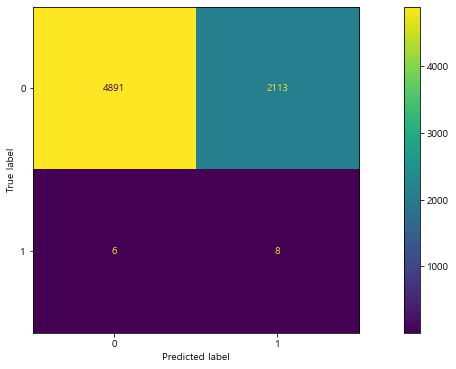

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, ajcat_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


plt.rcParams['figure.figsize'] = (16,6)
disp.plot()

In [89]:
asd[['model','SET1 test f1-Score','SET1 test Precision','SET1 test Recall']].sort_values(by='SET1 test Recall', ascending=False)

,model,SET1 test f1-Score,SET1 test Precision,SET1 test Recall
5,SVC,0.0124,0.0062,1.0000
0,Decision Tree,0.0364,0.0186,0.8302
8,MLP,0.0539,0.0278,0.8113
1,Random Forest,0.0519,0.0268,0.7925
6,lightGBM,0.0472,0.0243,0.7925
9,Xgboost,0.0488,0.0252,0.7925
7,Catboost,0.0533,0.0276,0.7736
2,Adaboost,0.0487,0.0251,0.7547
3,logistic,0.0640,0.0336,0.6792
4,KNN,0.0534,0.0278,0.6792


In [90]:
asd[['model','SET2 test f1_Score','SET2 test Precision','SET2 test Recall']].sort_values(by='SET2 test Recall', ascending=False)

,model,SET2 test f1_Score,SET2 test Precision,SET2 test Recall
5,SVC,0.0124,0.0062,1.0000
1,Random Forest,0.0648,0.0337,0.8302
7,Catboost,0.0643,0.0335,0.8302
2,Adaboost,0.0553,0.0286,0.8113
6,lightGBM,0.0583,0.0303,0.8113
0,Decision Tree,0.0338,0.0173,0.7547
8,MLP,0.0472,0.0243,0.7547
9,Xgboost,0.0540,0.0280,0.7547
3,logistic,0.0489,0.0253,0.6981
4,KNN,0.0552,0.0288,0.6792
